# Financial Data Statistics, Normal- and t-Distributions

In [1]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Download the S&P500 data from Kaggle
od.download("https://www.kaggle.com/datasets/camnugent/sandp500/download?datasetVersionNumber=4")
df = pd.read_csv('./sandp500/all_stocks_5yr.csv', parse_dates=True)
df.head()

Skipping, found downloaded files in "./sandp500" (use force=True to force download)


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
sbux = df[df['Name'] == 'SBUX']
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


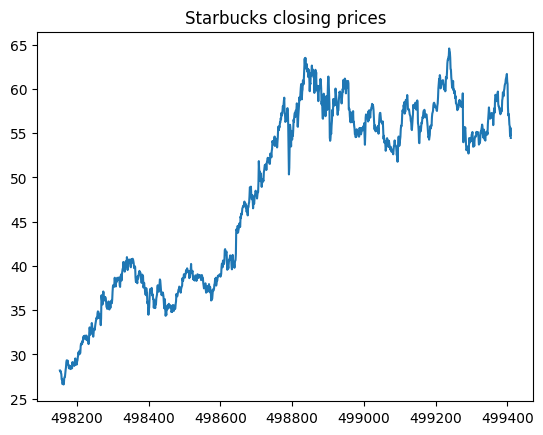

In [4]:
sbux['close'].plot();
plt.title("Starbucks closing prices");

In [5]:
sbux.insert(len(sbux.columns), 'prev close', sbux['close'].shift(1))
sbux.insert(len(sbux.columns), 'return', sbux['close'] / sbux['prev close'] - 1.0)
sbux.head()

,date,open,high,low,close,volume,Name,prev close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [6]:
# Pandas has a ready made function for calculating percentual changes directly
sbux.insert(len(sbux.columns), 'return 2', sbux['close'].pct_change(1))
sbux.head()

,date,open,high,low,close,volume,Name,prev close,return,return 2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


Mean: 0.0006002332205830914
Standard deviation: 0.012360934026133879


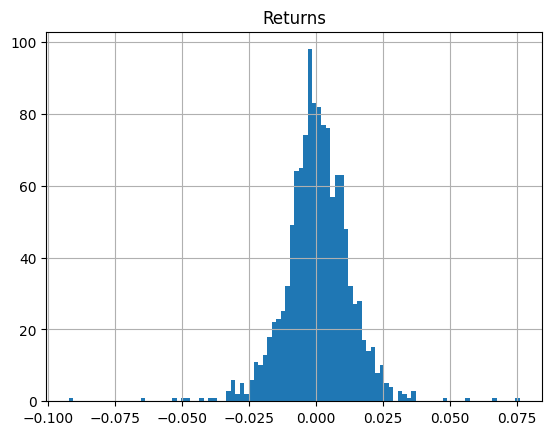

In [7]:
# Visualize distribution of the returns
sbux['return'].hist(bins=100)
plt.title("Returns")

# Print mean and standard deviation
print(f"Mean: {sbux['return'].mean()}")
print(f"Standard deviation: {sbux['return'].std()}")

In [8]:
# Log return
sbux.insert(len(sbux.columns), 'log return', np.log(sbux['return'] + 1.0))
sbux.head()

,date,open,high,low,close,volume,Name,prev close,return,return 2,log return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028


Mean: 0.0005235902748108682
Standard deviation: 0.012381234216101258


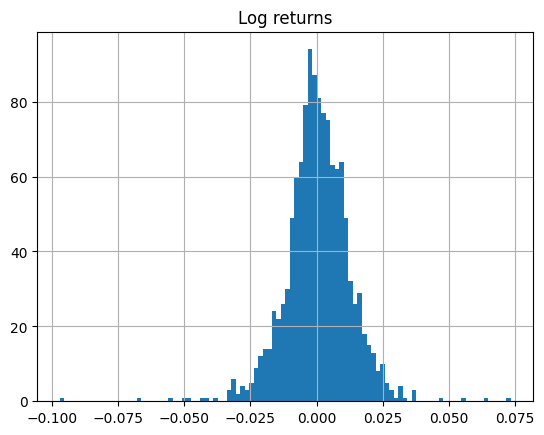

In [9]:
sbux['log return'].hist(bins=100)
plt.title("Log returns")

print(f"Mean: {sbux['log return'].mean()}")
print(f"Standard deviation: {sbux['log return'].std()}")

# Normal Distribution

Modeling returns using normal-distribution.

In [10]:
from scipy.stats import norm
from scipy.stats import probplot

## Returns

In [11]:
x = np.linspace(sbux['return'].min(), sbux['return'].max(), 100)
y = norm.pdf(x, loc=sbux['return'].mean(), scale=sbux['return'].std())

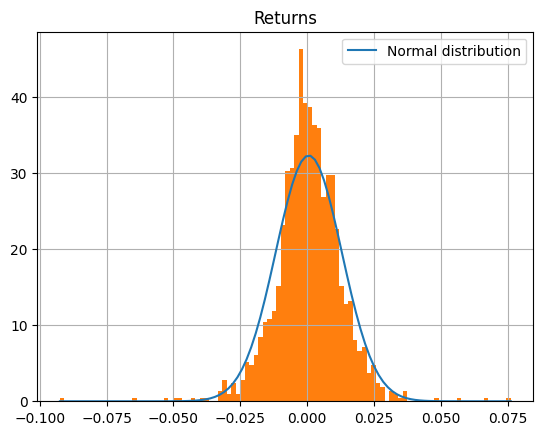

In [12]:
plt.plot(x, y, label='Normal distribution');
plt.title('Returns')
plt.legend()

sbux['return'].hist(bins=100, density=True);

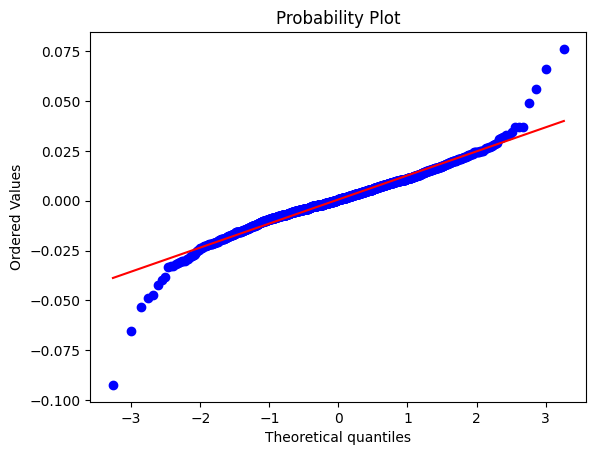

In [13]:
# Plot a QQ-plot (Quantile-Quantile) in order to see how well the returns follow a normal distribution.
# The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets 
# come from populations with a common distribution. 
probplot(sbux['return'].dropna(), dist='norm', fit=True, plot=plt);

# As we can see from the QQ-plot (Quartil-to-Quartil), normal distribution does not model well the returns.
# The tails don't match well. That is also observabla from the plot above. The real data 'falls' under
# the theoretical values of the normal probability density function.

In [14]:
# We can also use statsmodels for plotting QQ-plots.
# Statsmodels has more statistical tools that scipy
import statsmodels.api as sm

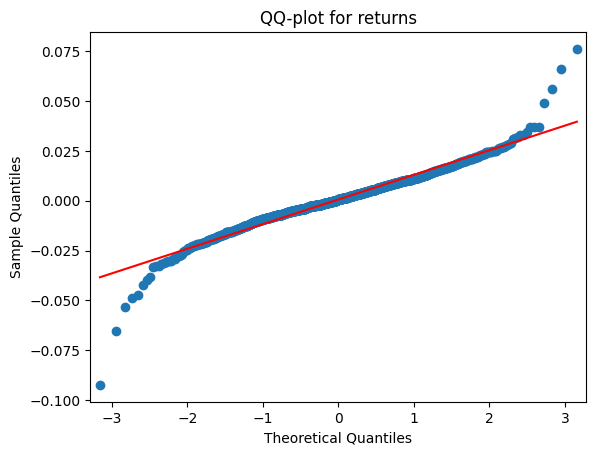

In [15]:
# QQ-plot using statsmodels.
#   dist: callable 
#     Comparison distribution. The default is scipy.stats.distributions.norm (a standard normal).
# By default qqplot uses normal-distribution

sm.qqplot(sbux['return'].dropna(), line='s');
plt.title("QQ-plot for returns")
plt.show()

## Log Return

In [16]:
x = np.linspace(sbux['log return'].min(), sbux['log return'].max(), 100)
y = norm.pdf(x, loc=sbux['log return'].mean(), scale=sbux['log return'].std())

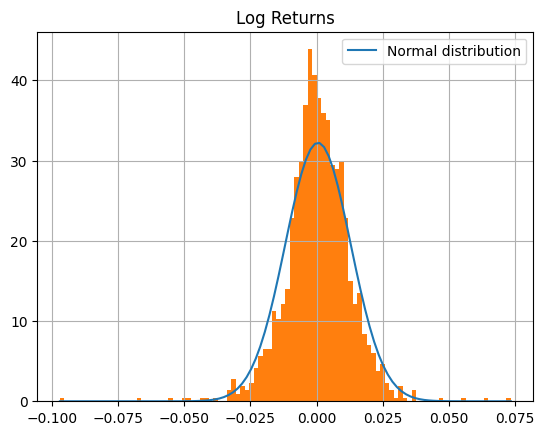

In [17]:
plt.plot(x, y, label="Normal distribution");
plt.title('Log Returns')
plt.legend()

sbux['log return'].hist(bins=100, density=True);

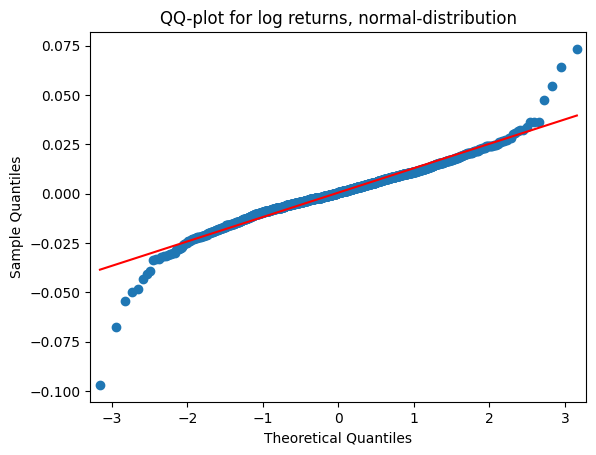

In [18]:
# “s” - standardized line, 
# the expected order statistics are scaled by the standard deviation of the given sample
# and have the mean added to them
sm.qqplot(sbux['log return'].dropna(), line='s')
plt.title("QQ-plot for log returns, normal-distribution")
plt.show()

# Student's t-distribution

> Student's t-distribution is any member of a family of continuous probability distributions that arise when estimating the mean of a normally distributed population in situations where the sample size is small and the population's standard deviation is unknown.
>
> The t-distribution plays a role in a number of widely used statistical analyses, including Student's t-test for assessing the statistical significance of the difference between two sample means, the construction of confidence intervals for the difference between two population means, and in linear regression analysis.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-distribution)

Student's t-distribution has the following probability density function (PDF):

$$f(t)=
\underbrace{
\dfrac{\Gamma\dfrac{\left(\nu+1\right)}{2}}{\sqrt{\nu\pi}\Gamma\left(\dfrac{\nu}{2}\right)}
}_{\text{scale}}
\underbrace{
\vphantom{\dfrac{\dfrac{1}{2}}{\dfrac{1}{2}}}
\left(1+\dfrac{t^2}{\nu}\right)^{-(\nu+1)/2}
}_{\text{shape}}$$

, where $\nu$ is the number of degrees of freedom and $\Gamma$ is the gamma function. First part of the function defines a scaling constant whereas the second part determines the shape of the distribution, which in this case is polynomial.

In [19]:
from scipy.stats import t
from scipy.stats import norm

In Scipy, t-distribution parameters are as follows:

* degrees of freedom parameter: $df = \nu$
* loc = location
* scale = scale

For more information, take a look at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [20]:
x = np.linspace(-10.0, 10.0, 100)
y_t_05 = t.pdf(x, df=0.5, loc=0.0, scale=1.0)
y_t_1 = t.pdf(x, df=1, loc=0.0, scale=1.0)
y_t_2 = t.pdf(x, df=2, loc=0.0, scale=1.0)
y_n = norm.pdf(x, loc=0.0, scale=1.0)

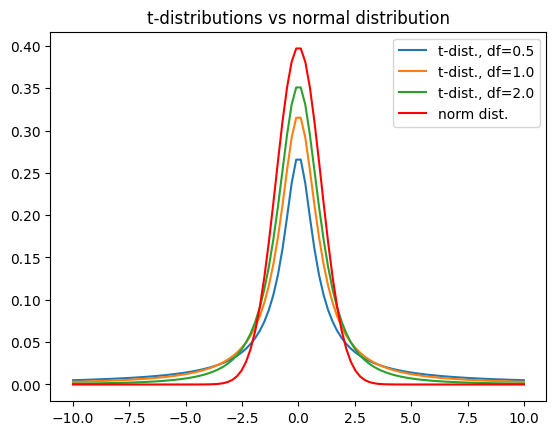

In [21]:
plt.plot(x, y_t_05, label='t-dist., df=0.5')
plt.plot(x, y_t_1, label='t-dist., df=1.0')
plt.plot(x, y_t_2, label='t-dist., df=2.0')
plt.plot(x, y_n, label='norm dist.', color='red')
plt.title('t-distributions vs normal distribution')
plt.legend()
plt.show()

## Returns

Estimate t-distribution parameters for returns.

In Scipy, t-distribution parameters are as follows:

* Degrees of freedom parameter: $df = \nu$
* loc = location
* scale = scale

For more information, take a look at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [22]:
# Estimate t-distribution parameters for the returns
df, loc, scale = t.fit(sbux['return'].dropna())
print(f'df: {df}')
print(f'loc: {loc}')
print(f'scale: {scale}')

df: 4.78753221828017
loc: 0.0007108616716254146
scale: 0.009341981642040986


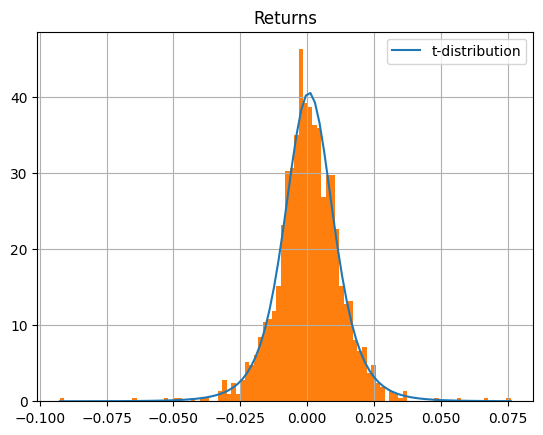

In [23]:
# Display results
x = np.linspace(sbux['return'].min(), sbux['return'].max(), 100)
y = t.pdf(x, df=df, loc=loc, scale=scale)
plt.plot(x, y, label="t-distribution");
plt.legend()
plt.title('Returns')
sbux['return'].hist(bins=100, density=True);

df: 4.78753221828017


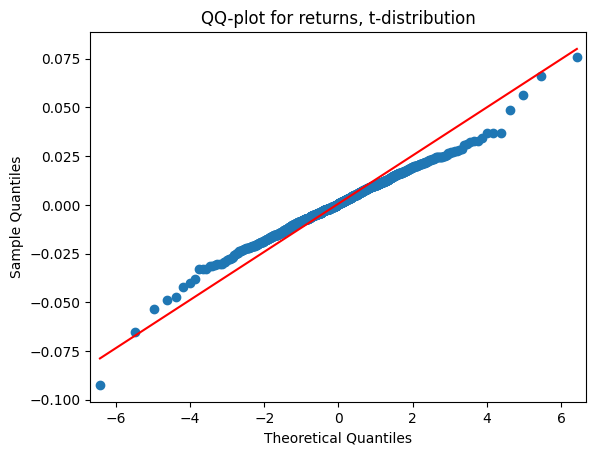

In [24]:
# In order to use another distribution in qqplot, we need to define a callback function for the
# parameter 'dist' as follows:
#   dist: callable 
#     Comparison distribution. The default is scipy.stats.distributions.norm (a standard normal).
# For more information, take a look at
#   https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html

# This is a simple functor for t-distribution that stores the degrees of freedom parameter passed to the constructor
class t_parameterised:
    def __init__(self, df):
        self.df = df
    
    def fit(self, x):
        return t.fit(x)
    
    def ppf(self, x, loc=0.0, scale=1.0):
        return t.ppf(x, self.df, loc, scale)

print(f'df: {df}')
sm.qqplot(sbux['return'].dropna(), dist=t_parameterised(df), line='s')
plt.title("QQ-plot for returns, t-distribution")
plt.show()

## Log Return

In [25]:
x = np.linspace(sbux['log return'].min(), sbux['log return'].max(), 100)

# Estimate t-distribution parameters for the log returns
df, loc, scale = t.fit(sbux['log return'].dropna())

y = t.pdf(x, df=df, loc=loc, scale=scale)

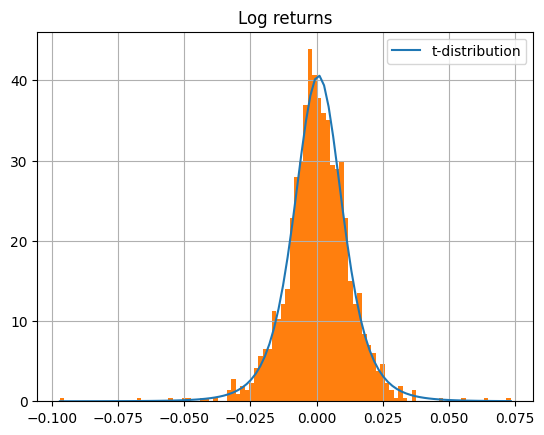

In [26]:
plt.plot(x, y, label='t-distribution');
plt.legend()
plt.title('Log returns')
sbux['log return'].hist(bins=100, density=True);

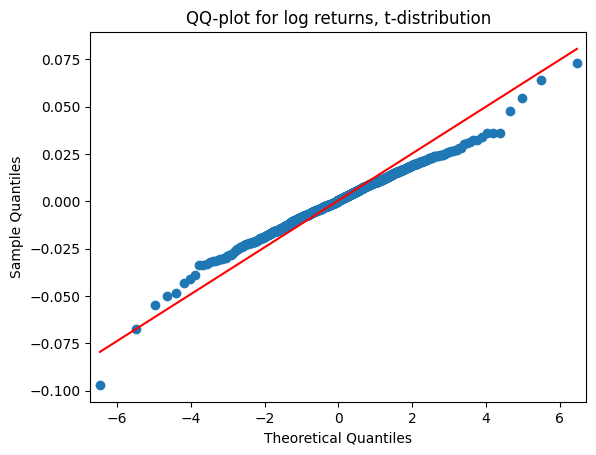

In [27]:
sm.qqplot(sbux['log return'].dropna(), dist=t_parameterised(df), line='s');
plt.title("QQ-plot for log returns, t-distribution")
plt.show()